In [1]:
import prepare as ppr
import acquire as aq 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_ind
from sklearn.tree import DecisionTreeClassifier as DTree

In [3]:
total_df = ppr.prep_telco(aq.get_telco_data())

In [4]:
first_years_df_total = total_df[total_df['tenure'] <= 12]
senior_df_total = total_df[total_df['tenure'] > 12]
tdf = total_df

## Grab only numeric Datafields

In [5]:
first_years_df = first_years_df_total[['customer_id',
 'tenure',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'tenure_yearly',
 'phone_id',
 'movies_encode',
 'tv_encode',
 'streaming_services',
 'online_security_encode',
 'online_backup_encode',
 'online_security_backup',
 'household_type_id',
 'gender_encode',
 'paperless_billing_encode',
 'tech_support_encode',
 'payment_type_id',
 'internet_service_type_id',
 'contract_type_id',
 'device_protection_encode',
 'monthly_charges',
 'total_charges',
 'churn_encode']]

In [6]:
senior_df = senior_df_total[['customer_id',
 'tenure',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'tenure_yearly',
 'phone_id',
 'movies_encode',
 'tv_encode',
 'streaming_services',
 'online_security_encode',
 'online_backup_encode',
 'online_security_backup',
 'household_type_id',
 'gender_encode',
 'paperless_billing_encode',
 'tech_support_encode',
 'payment_type_id',
 'internet_service_type_id',
 'contract_type_id',
 'device_protection_encode',
 'monthly_charges',
 'total_charges',
 'churn_encode']]

## Explore

In [7]:
### Shorthand dataframe names for simplicity, and data manip without
### Changing original Dataframes
fdf = first_years_df.copy()#[['tenure','streaming_services','internet_service_type_id','contract_type_id','monthly_charges','churn_encode']]
sdf = senior_df.copy()#[['tenure','streaming_services','internet_service_type_id','contract_type_id','monthly_charges','churn_encode']]

### Ttest of Churn between two populations

In [8]:
p_value_of_ttest = (list(ttest_ind(sdf['churn_encode'],fdf['churn_encode'])))[1]

In [9]:
p_value_of_ttest

9.215808687242088e-167

The P value is MUCH less than 0.05, therefore the populations are significantly different

Let's check the Churn drivers between the two populations

### Churn Drivers for Year 1's different than Long Terms

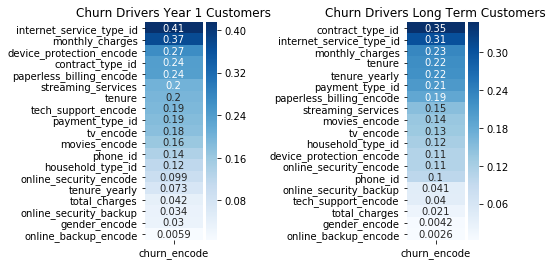

In [10]:

plt.subplot(141)
plt.title('Churn Drivers Year 1 Customers')
sns.heatmap((fdf.corr()[['churn_encode']].drop('churn_encode')).abs().sort_values('churn_encode', ascending = False),annot = True, cmap = 'Blues')

plt.subplot(144)
plt.title('Churn Drivers Long Term Customers')
sns.heatmap((sdf.corr()[['churn_encode']].drop('churn_encode')).abs().sort_values('churn_encode', ascending = False),annot = True, cmap = 'Blues')


In [11]:
fdf2 = fdf[[]]
fdf2['internet service'] = fdf['internet_service_type_id']
fdf2['contract type'] = fdf['monthly_charges']
fdf2['streaming services'] = fdf.streaming_services
fdf2['total charges'] = fdf.total_charges
fdf2['churned'] = fdf.churn_encode

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [12]:
list(fdf2.columns)

['internet service',
 'contract type',
 'streaming services',
 'total charges',
 'churned']

In [13]:
sdf2 = sdf[[]]
sdf2['contract type'] = sdf['contract_type_id']
sdf2['internet service'] = sdf['internet_service_type_id']

sdf2['monthly charges'] = sdf.monthly_charges
sdf2['tenure'] = sdf.tenure
sdf2['churned'] = sdf.churn_encode
list(sdf2.columns)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

['contract type', 'internet service', 'monthly charges', 'tenure', 'churned']

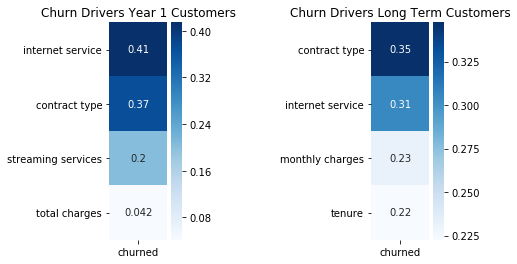

In [14]:
plt.subplot(141)
plt.title('Churn Drivers Year 1 Customers')
sns.heatmap((fdf2.corr()[['churned']].drop('churned')).abs(),annot = True, cmap = 'Blues')

plt.subplot(144)
plt.title('Churn Drivers Long Term Customers')
sns.heatmap((sdf2.corr()[['churned']].drop('churned')).abs(),annot = True, cmap = 'Blues')


Grab important fields for different DataFrames

In [15]:
sdf = sdf[['contract_type_id', 'internet_service_type_id','monthly_charges','tenure','churn_encode','total_charges']]

In [16]:
fdf = fdf[['internet_service_type_id','monthly_charges','contract_type_id','streaming_services','total_charges','churn_encode']]


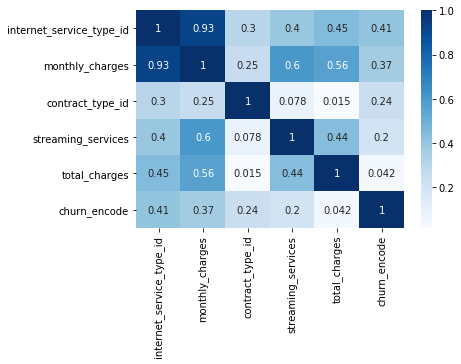

In [17]:
sns.heatmap((fdf.corr()).abs(),cmap='Blues',annot=True)

### Model Building Based on these fields

Train Test Split + Scaling

In [18]:
train_sdf, test_sdf = ppr.scale_split_data(*train_test_split(sdf,random_state=55))
train_fdf, test_fdf = ppr.scale_split_data(*train_test_split(fdf,random_state=22))
#train,test = ppr.scale_split_data(*train_test_split(tdf,random_state =55))

Drop non-scaled fields in all 4 dataframes

In [19]:
train_sdf.drop(['monthly_charges','total_charges','total_charges_scaled'],axis =1,inplace = True)
test_sdf.drop(['monthly_charges','total_charges','total_charges_scaled'],axis =1,inplace = True)
train_fdf.drop(['monthly_charges','total_charges','monthly_charges_scaled','total_charges_scaled'],axis =1,inplace = True)
test_fdf.drop(['monthly_charges','total_charges','monthly_charges_scaled','total_charges_scaled'],axis =1,inplace = True)


In [20]:
#train.drop(['monthly_charges','total_charges','monthly_charges_scaled','total_charges_scaled'],axis =1,inplace = True)
#test.drop(['monthly_charges','total_charges','monthly_charges_scaled','total_charges_scaled'],axis =1,inplace = True)


Senior Logisitc Regression prediction

In [21]:
logit_sdf = LogisticRegression()
logit_sdf.fit(train_sdf.drop(columns='churn_encode'),train_sdf[['churn_encode']])
sdf_pred = logit_sdf.predict(test_sdf.drop(columns='churn_encode'))

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
(test_sdf['churn_encode'] == sdf_pred).sum() / test_sdf.shape[0]

0.8452674897119341

Freshman Logistic Regression prediction

In [23]:
logit_fdf = LogisticRegression()
logit_fdf.fit(train_fdf.drop(columns='churn_encode'),train_fdf[['churn_encode']])
fdf_pred_proba = logit_fdf.predict(test_fdf.drop(columns='churn_encode'))
fdf_pred = logit_fdf.predict(test_fdf.drop(columns='churn_encode'))


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
(test_fdf['churn_encode'] == fdf_pred).sum() / test_fdf.shape[0]

0.7224264705882353

In [25]:
fdf_train_pp = logit_fdf.predict(train_fdf.drop(columns='churn_encode'))
fdf_train_pr = logit_fdf.predict_proba(train_fdf.drop(columns='churn_encode'))
fdf_test_pp = logit_fdf.predict(test_fdf.drop(columns='churn_encode'))
fdf_test_pr = logit_fdf.predict_proba(test_fdf.drop(columns='churn_encode'))

sdf_train_pp = logit_sdf.predict(train_sdf.drop(columns='churn_encode'))
sdf_train_pr = logit_sdf.predict_proba(train_sdf.drop(columns='churn_encode'))
sdf_test_pp = logit_sdf.predict(test_sdf.drop(columns='churn_encode'))
sdf_test_pr = logit_sdf.predict_proba(test_sdf.drop(columns='churn_encode'))

In [27]:
test_fdf['predict'] = fdf_test_pp
#test_fdf['customer id']=
test_fdf = test_fdf[['predict']]
train_fdf['predict'] = fdf_train_pp
train_fdf = train_fdf[['predict']]

In [28]:
test_fdf['predicted probability'] = fdf_test_pr[:,1]
train_fdf['predicted probability'] = fdf_train_pr[:,1]

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
test_sdf['predict'] = sdf_test_pp
test_sdf = test_sdf[['predict']]
train_sdf['predict'] = sdf_train_pp
train_sdf = train_sdf[['predict']]
test_sdf['predicted probability'] = sdf_test_pr[:,1]
train_sdf['predicted probability'] = sdf_train_pr[:,1]

In [30]:
df = pd.concat([train_sdf,test_sdf,train_fdf,test_fdf])

In [32]:
df['customer id'] = total_df.customer_id

In [33]:
df.to_csv('predictions.csv')

In [ ]:
!pwd